## Calculando los retornos historicos del S&P500

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Definimos los parametros basicos
tickers = ['^GSPC','^SP500TR']
start_date = '2014-12-31'
end_date = '2025-04-18'

In [17]:
df_aapl=yf.download('AAPL', start=start_date, end=end_date,auto_adjust=False)
df_aapl

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-12-31,24.554001,27.594999,28.282499,27.552500,28.205000,165613600
2015-01-02,24.320435,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.635290,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.637512,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.968966,26.937500,27.049999,26.674999,26.799999,160423600
...,...,...,...,...,...,...
2025-04-11,198.149994,198.149994,199.539993,186.059998,186.100006,87435900
2025-04-14,202.520004,202.520004,212.940002,201.160004,211.440002,101352900


### Diferencia entre Close y Adj Close

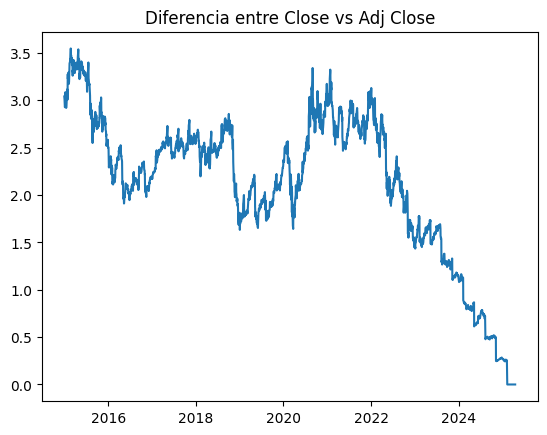

In [18]:
from datetime import date
plt.plot(df_aapl.index,df_aapl['Close']-df_aapl['Adj Close'])
plt.title('Diferencia entre Close vs Adj Close')
plt.show()

In [28]:
df=yf.download(tickers, start=start_date, end=end_date,auto_adjust=False)['Adj Close']
df

[*********************100%***********************]  2 of 2 completed


Ticker,^GSPC,^SP500TR
Date,,
2014-12-31,2058.899902,3769.439941
2015-01-02,2058.199951,3768.679932
2015-01-05,2020.579956,3700.030029
2015-01-06,2002.609985,3667.139893
2015-01-07,2025.900024,3710.939941
...,...,...
2025-04-11,5363.359863,11818.530273
2025-04-14,5405.970215,11912.450195
2025-04-15,5396.629883,11892.990234


In [32]:
df_returns=df.pct_change().cumsum().dropna()*100
df_returns

Ticker,^GSPC,^SP500TR
Date,,
2015-01-02,-0.033996,-0.020162
2015-01-05,-1.861807,-1.841753
2015-01-06,-2.751154,-2.730668
2015-01-07,-1.588170,-1.536275
2015-01-08,0.200658,0.254645
...,...,...
2025-04-11,112.832697,131.374205
2025-04-14,113.627169,132.168889
2025-04-15,113.454391,132.005531


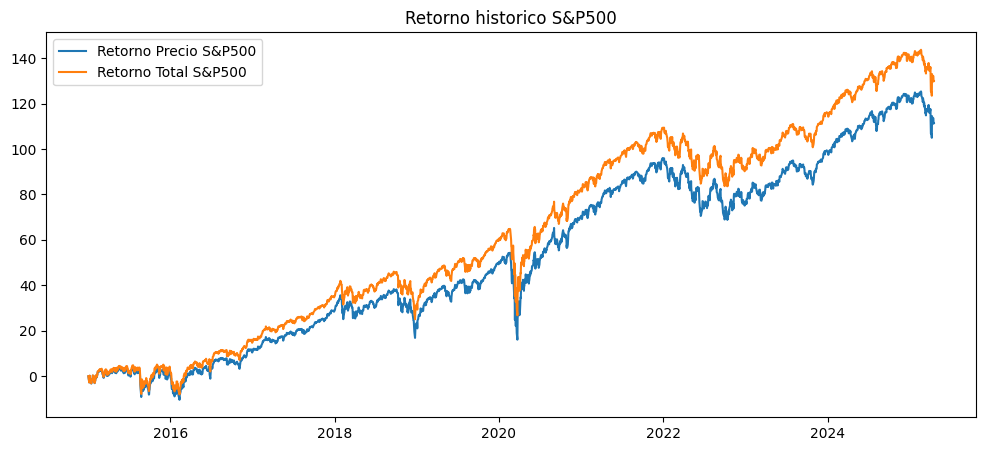

In [37]:
plt.figure(figsize=(12,5))
plt.plot(df_returns.index,df_returns['^GSPC'],label='Retorno Precio S&P500')
plt.plot(df_returns.index,df_returns['^SP500TR'],label='Retorno Total S&P500')
plt.title('Retorno historico S&P500')
plt.legend()
plt.show()